## **ARIMA**

In [1]:
!pip install pmdarima

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read CSV file

In [3]:
df=pd.read_csv('AirQualityUCI.csv',index_col='Date',parse_dates=True, dayfirst=True, na_values="-200")
print('Shape of data',df.shape)
df.head(8)

Shape of data (9357, 14)


,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","7,578"
2004-03-10,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","7,255"
2004-03-10,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","7,502"
2004-03-10,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","7,867"
2004-03-10,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","7,888"
2004-03-10,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","7,848"
2004-03-11,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","7,603"
2004-03-11,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","7,702"


Check for null values

In [4]:
df.isnull().sum()

Time                0
CO(GT)           1592
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [5]:
df=df.dropna(axis=0)

Plotting target variable

<Axes: xlabel='Date'>

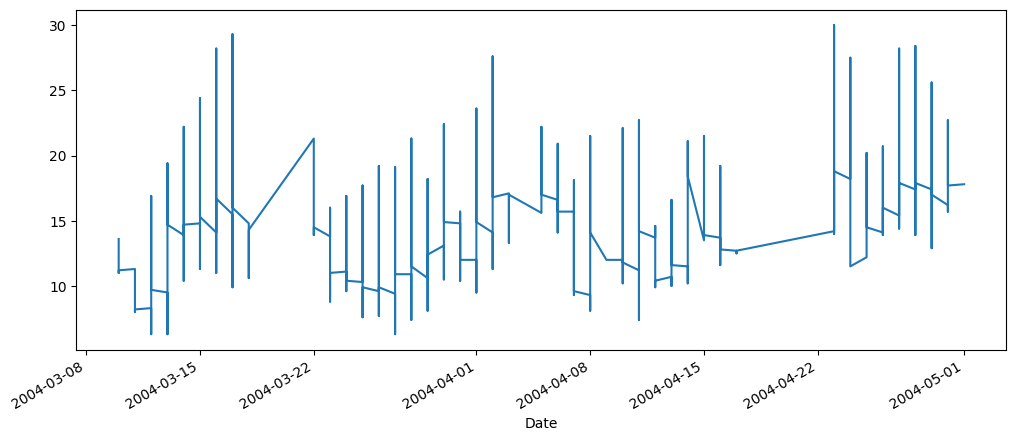

In [6]:
df['T']=df['T'].str.replace(',','.').astype(float)
df['CO(GT)']=df['CO(GT)'].str.replace(',','.').astype(float)
df['RH']=df['RH'].str.replace(',','.').astype(float)
df['AH']=df['AH'].str.replace(',','.').astype(float)
df['T'].plot(figsize=(12,5))

Checking for stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t",key, ": ", val)
adf_test(df['T'])

1. ADF :  -2.752547020684331
2. P-Value :  0.06537828915652208
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 805
5. Critical Values :
	 1% :  -3.4384994096285393
	 5% :  -2.8651370452361107
	 10% :  -2.56868539060993


figuring out the order of the ARIMA

In [8]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['T'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2709.039, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3026.122, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2789.567, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2829.312, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3024.132, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2793.422, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2792.381, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2795.068, Time=2.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2690.854, Time=2.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2791.478, Time=1.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2707.208, Time=2.84 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2664.667, Time=4.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2793.388, Time=0.85 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.33 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  827
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1323.220
Date:                Tue, 24 Oct 2023   AIC                           2658.441
Time:                        15:56:29   BIC                           2686.740
Sample:                             0   HQIC                          2669.296
                                - 827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8864      0.014    131.207      0.000       1.858       1.915
ar.L2         -0.9606      0.013    -71.667      0.000      -0.987      -0.934
ma.L1         -1.5459      0.027    -56.428      0.000      -1.600      -1.492
ma.L2          0.3335      0.046      7.256      0.000       0.243       0.424
ma.L3          0.2626      0.030      8.844      0.000       0.204       0.321
sigma2         1.4383      0.044     32.471      0.000       1.351       1.525
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               467.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best ARIMA model seems to be of the order (1,1,1) with the minimum AIC score=74255.729

Split Your Dataset

In [9]:
from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:-500]
test=df.iloc[-500:]
print(train.shape,test.shape)

(827, 14)
(327, 14) (500, 14)


Train the model

In [10]:
model=ARIMA(train['T'],order=(1,1,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      T   No. Observations:                  327
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -568.903
Date:                Tue, 24 Oct 2023   AIC                           1143.807
Time:                        15:56:29   BIC                           1155.168
Sample:                             0   HQIC                          1148.340
                                - 327                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5379      0.099      5.442      0.000       0.344       0.732
ma.L1         -0.0874      0.105     -0.835      0.404      -0.293       0.118
sigma2         1.9185      0.092     20.834      0.000       1.738       2.099
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               187.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make predictions on test set

Date
2004-03-29    15.654577
2004-03-29    15.414976
2004-03-29    15.286090
2004-03-29    15.216760
2004-03-29    15.179467
                ...    
2004-04-30    15.136053
2004-04-30    15.136053
2004-04-30    15.136053
2004-04-30    15.136053
2004-05-01    15.136053
Name: ARIMA Predictions, Length: 500, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

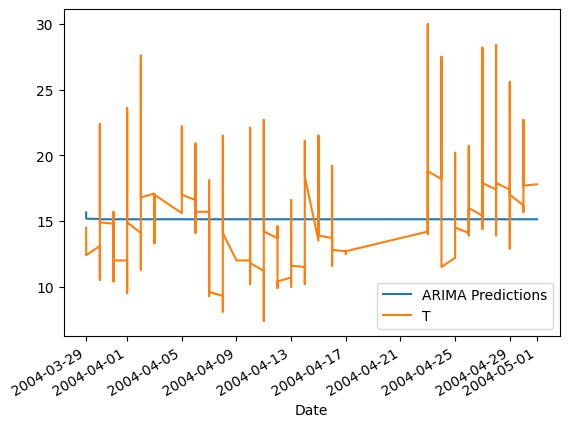

In [11]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

pred.plot(legend=True)
test['T'].plot(legend=True)

In [12]:
test['T'].mean()

16.6644

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rmse=np.sqrt(mean_squared_error(pred,test['T']))
print("Root Mean Squared Error: ",rmse)
mae = mean_absolute_error(pred,test['T'])
print("Mean Absolute Error: ",mae)
r2 = r2_score(pred,test['T'])
print("R-squared: ",r2)

Root Mean Squared Error:  4.82685060021118
Mean Absolute Error:  3.6604732581167574
R-squared:  -30995.524492567296


For Future Dates

In [14]:
model2=ARIMA(df['T'],order=(1,1,1))
model2=model2.fit()
df.tail

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<bound method NDFrame.tail of                 Time  CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                          
2004-03-10  18.00.00     2.6       1360.0     150.0     11,9         1046.0   
2004-03-10  19.00.00     2.0       1292.0     112.0      9,4          955.0   
2004-03-10  20.00.00     2.2       1402.0      88.0      9,0          939.0   
2004-03-10  21.00.00     2.2       1376.0      80.0      9,2          948.0   
2004-03-10  22.00.00     1.6       1272.0      51.0      6,5          836.0   
...              ...     ...          ...       ...      ...            ...   
2004-04-30  20.00.00     4.4       1449.0     501.0     19,5         1282.0   
2004-04-30  21.00.00     3.1       1363.0     234.0     15,1         1152.0   
2004-04-30  22.00.00     3.0       1371.0     212.0     14,6         1136.0   
2004-04-30  23.00.00     3.1       1406.0     275.0     13,7         1107.0   
2004-05-01  00.00.00  

In [15]:
index_future_dates=pd.date_range(start='2005-04-04',end='2005-05-04')
print(index_future_dates)
pred_arima=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred_arima.index=index_future_dates
print(pred_arima)

DatetimeIndex(['2005-04-04', '2005-04-05', '2005-04-06', '2005-04-07',
               '2005-04-08', '2005-04-09', '2005-04-10', '2005-04-11',
               '2005-04-12', '2005-04-13', '2005-04-14', '2005-04-15',
               '2005-04-16', '2005-04-17', '2005-04-18', '2005-04-19',
               '2005-04-20', '2005-04-21', '2005-04-22', '2005-04-23',
               '2005-04-24', '2005-04-25', '2005-04-26', '2005-04-27',
               '2005-04-28', '2005-04-29', '2005-04-30', '2005-05-01',
               '2005-05-02', '2005-05-03', '2005-05-04'],
              dtype='datetime64[ns]', freq='D')
2005-04-04    17.852244
2005-04-05    17.878012
2005-04-06    17.890722
2005-04-07    17.896991
2005-04-08    17.900082
2005-04-09    17.901607
2005-04-10    17.902360
2005-04-11    17.902731
2005-04-12    17.902914
2005-04-13    17.903004
2005-04-14    17.903048
2005-04-15    17.903070
2005-04-16    17.903081
2005-04-17    17.903086
2005-04-18    17.903089
2005-04-19    17.903090
2005-04-20   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)



## **OTHER REGRESSION APPROACHES**

In [16]:
x1,x2,x3,y=df['CO(GT)'],df['PT08.S3(NOx)'],df['NO2(GT)'],df['T']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
y=y.ravel()
print(final_x)

[[   2.6 1056.   113. ]
 [   2.  1174.    92. ]
 [   2.2 1140.   114. ]
 ...
 [   3.   689.   102. ]
 [   3.1  718.   108. ]
 [   3.5  709.   110. ]]


In [17]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test=final_x[:-500],y[:-500],final_x[-500:],y[-500:]

In [18]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)
model3.fit(X_train,Y_train.ravel())
model3_predict=model3.predict(X_test)

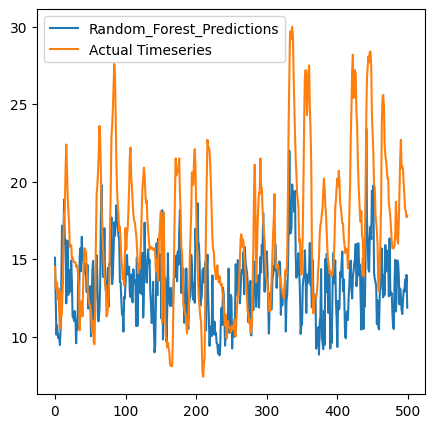

In [19]:
pred=model3.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(Y_test,label='Actual Timeseries')
plt.legend(loc="upper left")
plt.show()

In [20]:
rmse1 = np.sqrt(mean_squared_error(Y_test, pred))
print("Root Mean Squared Error: ",rmse1)
mae1 = mean_absolute_error(Y_test, pred)
print("Mean Absolute Error: ",mae1)
r2_1 = r2_score(Y_test, pred)
print("R-squared: ",r2_1)

Root Mean Squared Error:  5.3092372514326405
Mean Absolute Error:  4.157372000000001
R-squared:  -0.3451289006075089


In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,Y_train.ravel())

SVR()

In [22]:
y_pred_s = regressor.predict(X_test)
y_pred_s

array([14.10229029, 13.24907661, 11.9351172 , 11.45912811, 10.98718625,
       10.47393078, 10.18333284, 10.56586621, 10.96713647, 13.13187157,
       14.84902352, 15.49973883, 15.51191257, 15.496499  , 15.36281552,
       15.31585196, 15.10929127, 14.17813173, 13.81068856, 13.24530147,
       14.61035908, 14.73242948, 14.93688278, 14.56198289, 13.1570147 ,
       12.52785233, 12.99673387, 12.25478355, 11.35038795, 11.87839998,
        9.50588091, 10.147233  , 11.95070388, 15.292815  , 15.45916982,
       14.70230403, 14.13862514, 14.475287  , 15.14219495, 14.81001769,
       15.01131612, 15.21720475, 14.77977093, 14.95013299, 14.89944419,
       14.92148144, 14.58312459, 13.40258154, 13.09377736, 12.92983301,
       13.83228598, 13.44220146, 12.9678185 , 11.70829989, 12.20623235,
       13.65470462, 15.34475319, 15.47573094, 15.53518974, 15.02558444,
       13.954635  , 13.87905444, 14.13583749, 15.03329826, 15.4105462 ,
       15.60613911, 15.55382857, 14.93598175, 14.81726606, 14.48

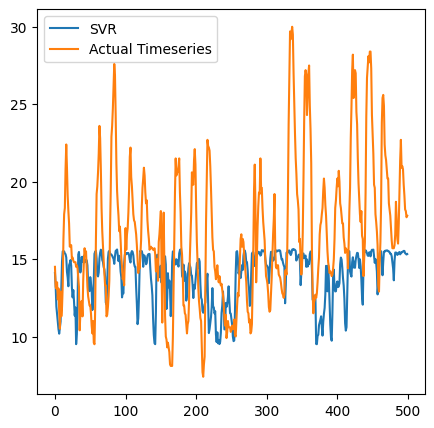

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(y_pred_s,label='SVR')
plt.plot(Y_test,label='Actual Timeseries')
plt.legend(loc="upper left")
plt.show()

In [24]:
rmse2 = np.sqrt(mean_squared_error(Y_test, y_pred_s))
print("Root Mean Squared Error: ",rmse2)
mae2 = mean_absolute_error(Y_test, y_pred_s)
print("Mean Absolute Error: ",mae2)
r2_2 = r2_score(Y_test, y_pred_s)
print("R-squared: ",r2_2)

Root Mean Squared Error:  4.988063849022771
Mean Absolute Error:  3.818335796961588
R-squared:  -0.1873086885770885


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators = 1000)
gb_reg = gb_reg.fit(X_train, Y_train.ravel())
y_pred_gb = gb_reg.predict(X_test)
y_pred_gb

array([12.39736538, 13.03126252, 11.92393864, 10.83837575, 10.48120977,
        9.81304724,  9.98787994,  8.7042986 , 10.96649055, 11.67982056,
       14.32999902, 10.93030044, 16.19876753, 17.07390737, 18.82305875,
       14.33551501, 11.96570365, 13.75155399, 12.71472622, 11.93203392,
       16.00073671, 14.68896614, 11.70554967, 14.30092251, 11.72513915,
       12.00901382,  9.60714649,  9.97829455, 13.29846763,  9.803095  ,
        9.32149253, 11.88662585,  9.55636858, 16.30082723, 15.2532211 ,
       16.68228816, 15.15083047, 11.82703684, 20.56659456, 13.05483378,
       15.88824239, 13.92084983, 10.89025134, 12.91349033, 13.59558995,
       13.1141734 , 13.04203887,  8.23074197, 10.47301502, 13.63104264,
       11.49191798,  8.47669978, 17.04993586, 13.48377209, 15.23219198,
        7.21100686, 12.63315709, 12.21773608, 16.54371982, 14.41213997,
        9.40018832, 12.48355548,  9.5089037 , 10.23202686, 12.86862775,
       16.06377127, 18.00099993, 15.08869153, 10.4577011 , 14.09

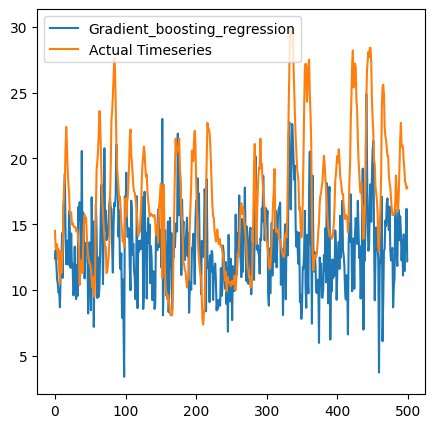

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(y_pred_gb,label='Gradient_boosting_regression')
plt.plot(Y_test,label='Actual Timeseries')
plt.legend(loc="upper left")
plt.show()

In [27]:
rmse3 = np.sqrt(mean_squared_error(Y_test, y_pred_gb))
print("Root Mean Squared Error: ",rmse3)
mae3 = mean_absolute_error(Y_test, y_pred_gb)
print("Mean Absolute Error: ",mae3)
r2_3 = r2_score(Y_test, y_pred_gb)
print("R-squared: ",r2_3)

Root Mean Squared Error:  5.812676877537259
Mean Absolute Error:  4.5960333994504055
R-squared:  -0.6123228207684743


In [28]:
df.info

<bound method DataFrame.info of                 Time  CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                          
2004-03-10  18.00.00     2.6       1360.0     150.0     11,9         1046.0   
2004-03-10  19.00.00     2.0       1292.0     112.0      9,4          955.0   
2004-03-10  20.00.00     2.2       1402.0      88.0      9,0          939.0   
2004-03-10  21.00.00     2.2       1376.0      80.0      9,2          948.0   
2004-03-10  22.00.00     1.6       1272.0      51.0      6,5          836.0   
...              ...     ...          ...       ...      ...            ...   
2004-04-30  20.00.00     4.4       1449.0     501.0     19,5         1282.0   
2004-04-30  21.00.00     3.1       1363.0     234.0     15,1         1152.0   
2004-04-30  22.00.00     3.0       1371.0     212.0     14,6         1136.0   
2004-04-30  23.00.00     3.1       1406.0     275.0     13,7         1107.0   
2004-05-01  00.00.00